IMPORT LIBRARY

In [187]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, optimizers, datasets
import matplotlib.pyplot as plt

# IMPORY DATASET DARI TENSORFLOW

In [228]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load(
    "kmnist",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True
)

info

tfds.core.DatasetInfo(
    name='kmnist',
    full_name='kmnist/3.0.1',
    description="""
    Kuzushiji-MNIST is a drop-in replacement for the MNIST dataset (28x28 grayscale, 70,000 images), provided in the original MNIST format as well as a NumPy format. Since MNIST restricts us to 10 classes, we chose one character to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST.
    """,
    homepage='http://codh.rois.ac.jp/kmnist/index.html.en',
    data_path='C:\\Users\\USER\\tensorflow_datasets\\kmnist\\3.0.1',
    file_format=tfrecord,
    download_size=20.26 MiB,
    dataset_size=31.76 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
  

# JUMLAH CLASS

In [203]:
print("Class        : ",info.features['label'].names)
print("Jumlah Class : ",info.features['label'].num_classes)

Class        :  ['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']
Jumlah Class :  10


# ENCODING DENGAN ONE-HOT ENCODING

In [206]:
num_class = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test  = tf.keras.utils.to_categorical(y_test_raw, num_class)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# DATA-DATA GAMBAR

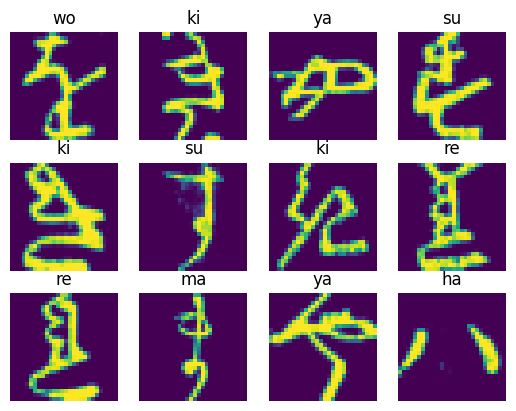

In [207]:
i = 0
for image, label in dataset["train"].take(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(image)
    plt.title(info.features["label"].names[label])
    plt.axis("off")
    i += 1

plt.show()

In [209]:
#Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# SEQUENTIAL MODEL

In [211]:
model = keras.Sequential([
layers.Dense(512, activation='relu', input_dim = 784),
layers.Dense(256, activation='relu'),
layers.Dense(124, activation='relu'),
layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 512)               401920    
                                                                 
 dense_95 (Dense)            (None, 256)               131328    
                                                                 
 dense_96 (Dense)            (None, 124)               31868     
                                                                 
 dense_97 (Dense)            (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


# OPTIMALISASI MODEL DENGAN CARA DI COMPILE

In [212]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Optimizer,
metrics=['accuracy'])

# FITTING TRANING MODEL

In [213]:
model.fit(x_train, y_train,
batch_size=128,
epochs=10,
verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2275 - accuracy: 0.9327
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0838 - accuracy: 0.9740
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0557 - accuracy: 0.9824
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0400 - accuracy: 0.9876
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0251 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0218 - accuracy: 0.9929
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0175 - accuracy: 0.9941

# Evaluasi Model

In [224]:
score = model.evaluate(x_test, y_test, verbose=1)

print(f"TEST LOSS\t: {score[0]}\
    \nTEST ACCURACY\t: {score[1]*100}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9824
TEST LOSS	: 0.06858474761247635    
TEST ACCURACY	: 98.24000000953674%


In [225]:
score = model.evaluate(x_train, y_train, verbose=1)

print(f"TRAINING LOSS\t\t: {score[0]}\
    \nTRAINING ACCURACY\t: {score[1]*100}%")

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - accuracy: 0.9970
TRAINING LOSS		: 0.010094488970935345    
TRAINING ACCURACY	: 99.69833493232727%


# SAVING

In [229]:
model.save("model.h5")